

https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/?utm_source=blog&utm_medium=3-techniques-extract-features-from-image-data-machine-learning

In [2]:
'''
Grayscale Pixel Values as Features
'''
# importing library and read the image 
import numpy as np
from skimage.io import imread, imshow
image = imread('puppy.jpeg' , as_gray=True) 

# shape of the image
print('\n\nShape of the image = ',image.shape)

# create features
features = np.reshape(image, (660*450))

# shape of feature array
print('\n\nShape of the feature array = ',features.shape)

print('\n\nFeature Array\n\n',features)



Shape of the image =  (660, 450)


Shape of the feature array =  (297000,)


Feature Array

 [0.96470588 0.96470588 0.96470588 ... 0.96862745 0.96470588 0.96470588]


(660, 450)


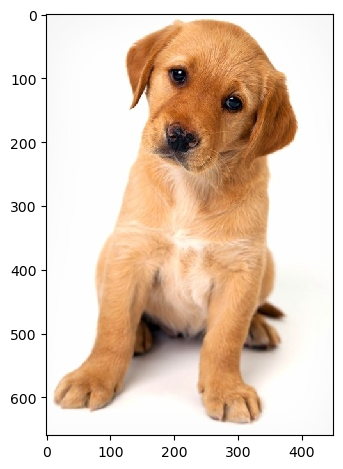

In [3]:

image = imread('puppy.jpeg')
features = np.zeros((660,450))
print(features.shape)
imshow(image)

In [4]:
for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        features[i][j] = ((int(image[i,j,0]) + int(image[i,j,1]) + int(image[i,j,2]))/3)
print(features)

[[246. 246. 246. ... 246. 246. 246.]
 [246. 246. 246. ... 246. 246. 246.]
 [246. 246. 246. ... 246. 246. 246.]
 ...
 [251. 251. 251. ... 247. 246. 246.]
 [250. 250. 250. ... 247. 246. 246.]
 [247. 247. 247. ... 247. 246. 246.]]


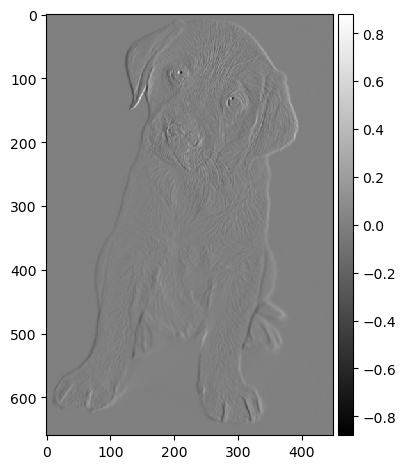

In [5]:
#importing the required libraries
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

#reading the image 
image = imread('puppy.jpeg',as_gray=True)

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

imshow(edges_prewitt_vertical, cmap='gray')

(660, 450, 3)


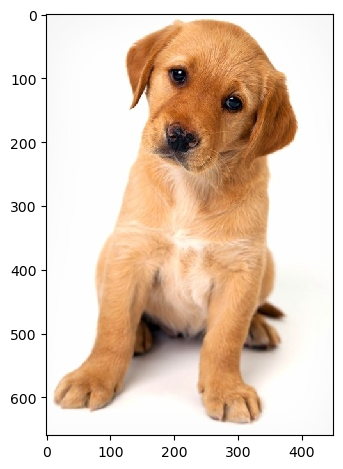

In [6]:
#importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline


#reading the image
img = imread('puppy.jpeg')
imshow(img)
print(img.shape)


(128, 64, 3)


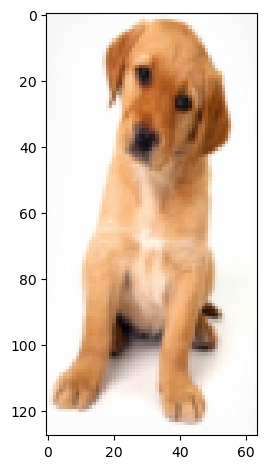

In [7]:
#resizing image 
resized_img = resize(img, (128,64)) 
imshow(resized_img) 
print(resized_img.shape)

In [8]:
# Importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

# Reading the image
img = imread('puppy.jpeg')

# Resizing the image
resized_img = resize(img, (128, 64))

# Generating HOG features
# Note: Removed the `multichannel=True` parameter
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, channel_axis=-1)

print('\n\nShape of Image Features\n\n')
print(fd.shape)




Shape of Image Features


(3780,)


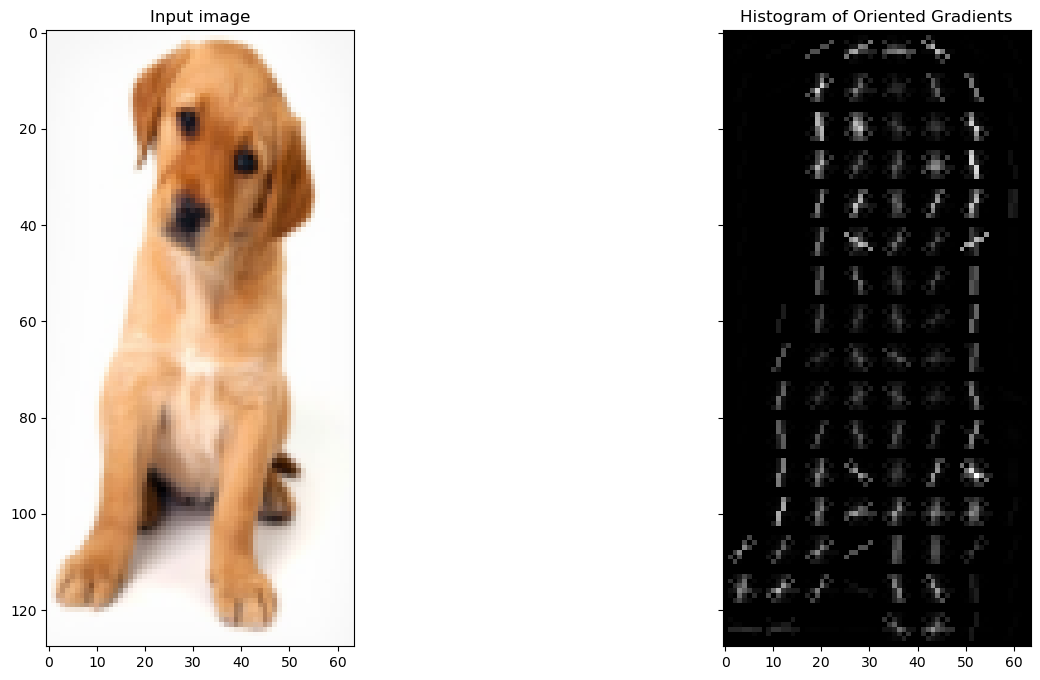

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()